In [131]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

In [132]:
raw_data_file_name= "Clustered_Data/dilum_sir_route_without_duplications_radius_5_samplesize_5.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.731683,79.909552
1,A,0,6.731683,79.909552
2,A,1,6.734659,79.923194
3,A,0,6.731710,79.909550
4,A,0,6.731704,79.909548


In [133]:
raw_data.shape

(6, 4)

In [134]:
raw_data = raw_data.sort_values(by=['cluster'])

In [135]:
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.731683,79.909552
1,A,0,6.731683,79.909552
3,A,0,6.731710,79.909550
4,A,0,6.731704,79.909548
5,A,0,6.731698,79.909565


In [136]:
raw_data = raw_data.groupby(['cluster']).mean()
raw_data

,lat,lon
cluster,,
0,6.731695,79.909553
1,6.734659,79.923194


In [137]:
raw_data.head()

,lat,lon
cluster,,
0,6.731695,79.909553
1,6.734659,79.923194


In [138]:
raw_data.shape

(2, 2)

In [139]:
raw_data = pd.DataFrame(raw_data).reset_index()

In [140]:
raw_data.head()

,cluster,lat,lon
0,0,6.731695,79.909553
1,1,6.734659,79.923194


In [141]:
raw_data.shape

(2, 3)

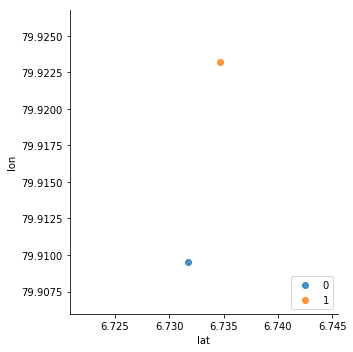

In [142]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=raw_data, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [143]:
raw_data.to_json("Map_data/dilum_sir_route_without_duplications_radius_5_samplesize_5.json", orient='records')